# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Aug 2023`.

In [36]:
import pandas as pd
import scipy.stats
import numpy as np

In [26]:
df_hf_r = pd.read_excel(r'../data/proshares_analysis_data.xlsx', sheet_name=r'hedge_fund_series')
df_hf_r.columns = ["Date"] + [df_hf_r.columns[i] for i in range(1,len(df_hf_r.columns))]
df_hf_r

,Date,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
0,2011-08-31,-0.032149,-0.025588,-0.025689,-0.027034,-0.006491
1,2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022143
2,2011-10-31,0.026858,0.043593,0.043320,0.050532,0.025242
3,2011-11-30,-0.013453,-0.012142,-0.012431,-0.028607,-0.007963
4,2011-12-31,-0.004479,0.001938,0.001796,0.012874,0.001818
...,...,...,...,...,...,...
140,2023-04-30,0.002400,0.000852,0.000333,-0.000440,0.005135
141,2023-05-31,-0.002000,-0.001045,-0.001458,-0.001446,-0.006471
142,2023-06-30,0.021400,0.015901,0.015936,0.016662,0.022626
143,2023-07-31,0.017800,0.017204,0.016615,0.013717,0.019440


## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [27]:
df_hf_ss = df_hf_r.iloc[:,1:].agg(["mean", "std"]).T
df_hf_ss["mean"] *= 12
df_hf_ss["std"] *= 12**.5
df_hf_ss["Sharpe"] = df_hf_ss["mean"] / df_hf_ss["std"]
df_hf_ss = df_hf_ss.sort_values(by="Sharpe",ascending=False)
df_hf_ss

,mean,std,Sharpe
HFRIFWI Index,0.043223,0.060228,0.717668
MLEIFCTR Index,0.031885,0.056966,0.559721
MLEIFCTX Index,0.030399,0.056806,0.535142
QAI US Equity,0.019611,0.050062,0.391729
HDG US Equity,0.020513,0.059367,0.345534


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [49]:
data = {"Skew": scipy.stats.skew(df_hf_r.iloc[:,1:]), 
        "Excess Kurtosis": scipy.stats.kurtosis(df_hf_r.iloc[:,1:], fisher=False),
        "VaR (0.05)": [np.percentile(df_hf_r.iloc[:,i], 0.05) for i in range(1,len(df_hf_r.columns))],
        "CVaR (0.05)": [df_hf_r.iloc[:,i][df_hf_r.iloc[:,i] <= np.percentile(df_hf_r.iloc[:,i], 0.05)].mean() for i in range(1,len(df_hf_r.columns))],
        }
df_hf_risk_ss = pd.DataFrame(data, index=df_hf_r.columns[1:])
df_hf_risk_ss


,Skew,Excess Kurtosis,VaR (0.05),CVaR (0.05)
HFRIFWI Index,-0.972971,8.675092,-0.087048,-0.090784
MLEIFCTR Index,-0.253173,4.566407,-0.052265,-0.053234
MLEIFCTX Index,-0.239306,4.534748,-0.051458,-0.052384
HDG US Equity,-0.241428,4.678181,-0.058005,-0.059181
QAI US Equity,-0.453604,4.637149,-0.055157,-0.056347


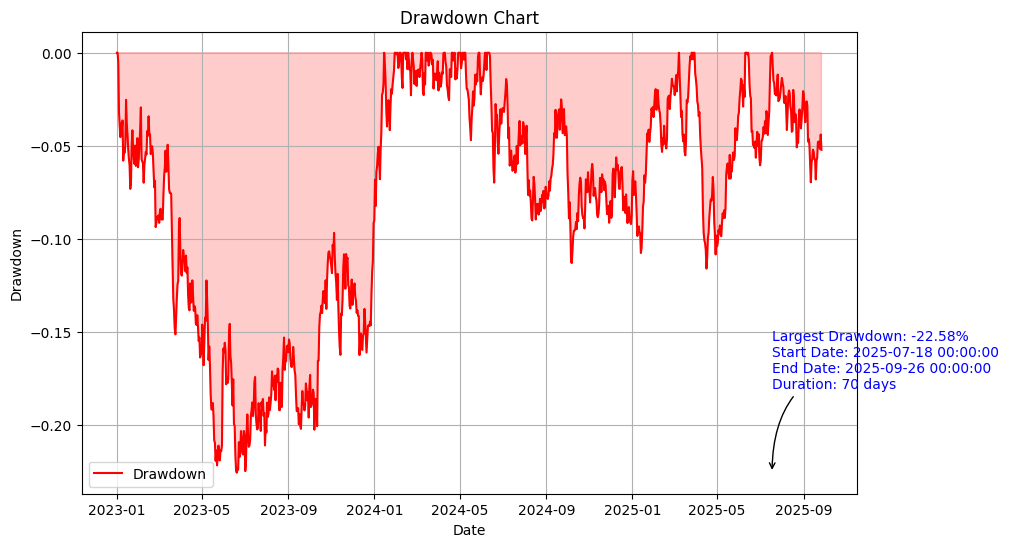

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample time series data
data = {'Date': pd.date_range(start='2023-01-01', periods=1000),
        'Price': np.random.randn(1000).cumsum() + 100}

df = pd.DataFrame(data)
df.index = df["Date"]
df.drop(['Date'],axis=1,inplace=True)
# print(df)
def draw_down(return_series: pd.Series):
    df = pd.DataFrame(return_series)

    # Calculate drawdowns
    df['Peak'] = df['Price'].cummax()
    df['Drawdown'] = (df['Price'] - df['Peak']) / df['Peak']

    # Find the largest drawdown
    # largest_drawdown = df['Drawdown'].min()
    largest_drawdown = 0
    for 

    # Find the start date by locating the previous cumulative maximum
    # previous_max_date = df[df['Peak'] == df['Peak'].loc[:df.index[-1]].max()].index[0]

    # Find the end date as the date when drawdown returns to zero
    # end_date = df[(df.index > previous_max_date) & (df['Drawdown'] == 0)].index.min()

    if pd.isna(end_date):
        # If drawdown doesn't return to zero, set end_date to the most recent date
        end_date = df.index[-1]

    # Calculate the duration
    drawdown_duration = (end_date - previous_max_date).days if end_date != previous_max_date else None

    # Create a drawdown chart
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Drawdown'], label='Drawdown', color='red')
    plt.fill_between(df.index, 0, df['Drawdown'], where=df['Drawdown'] < 0, color='red', alpha=0.2)

    # Mark the largest drawdown on the chart
    plt.annotate(f"Largest Drawdown: {largest_drawdown * 100:.2f}%\nStart Date: {previous_max_date}\nEnd Date: {end_date}\nDuration: {drawdown_duration} days",
                 xy=(previous_max_date, largest_drawdown), xytext=(previous_max_date, largest_drawdown * 0.8),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'), fontsize=10, color='blue')

    plt.title('Drawdown Chart')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.grid(True)
    plt.show()
draw_down(df)


## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

Slope: 0.3487
Intercept: -0.0003
R-squared: 0.7140
P-value: 0.0000
Standard Error: 0.0185


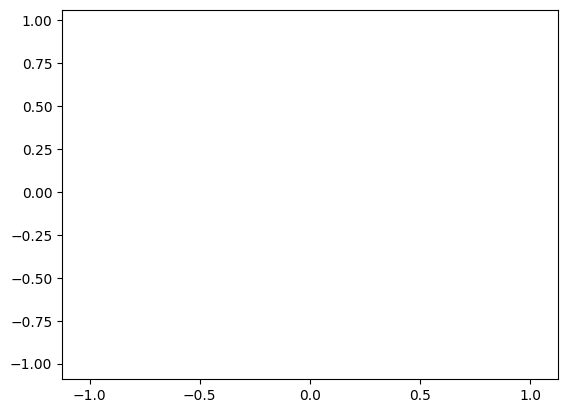

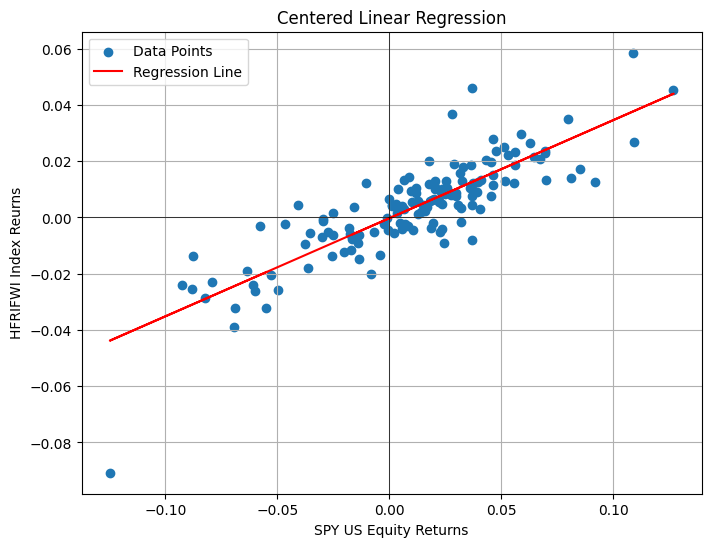

Slope: 0.3487
Intercept: -0.0003
R-squared: 0.7140
P-value: 0.0000
Standard Error: 0.0185


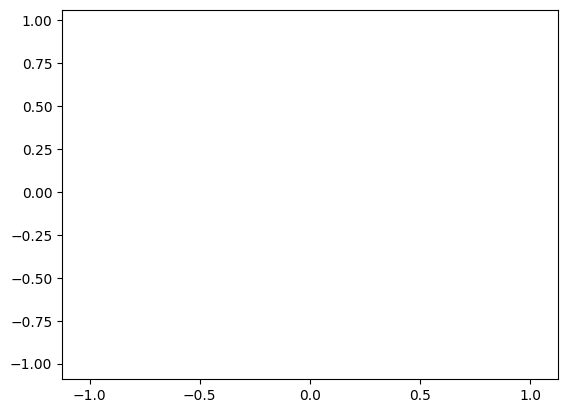

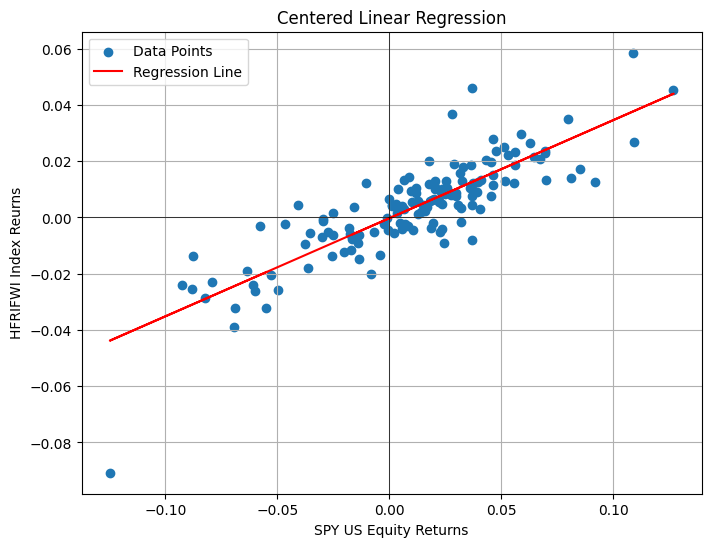

Slope: 0.3487
Intercept: -0.0003
R-squared: 0.7140
P-value: 0.0000
Standard Error: 0.0185


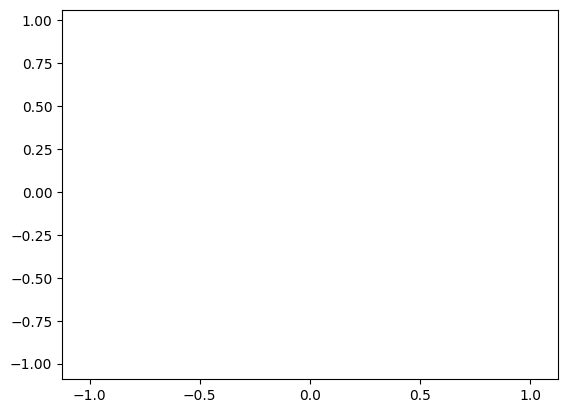

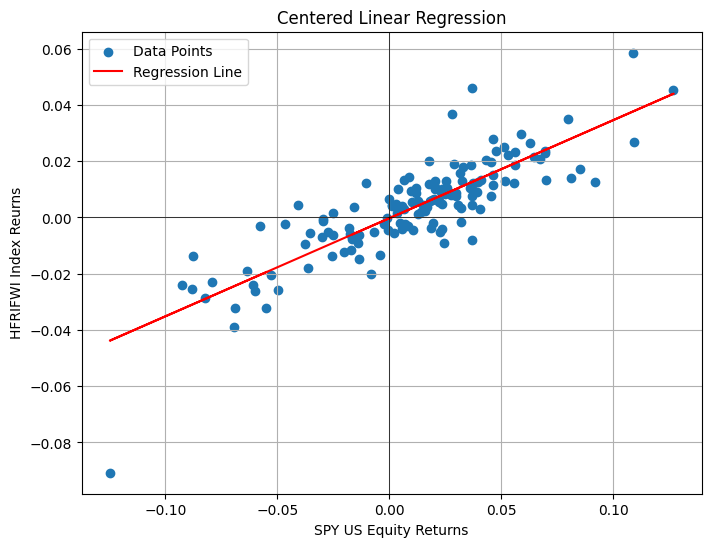

Slope: 0.3487
Intercept: -0.0003
R-squared: 0.7140
P-value: 0.0000
Standard Error: 0.0185


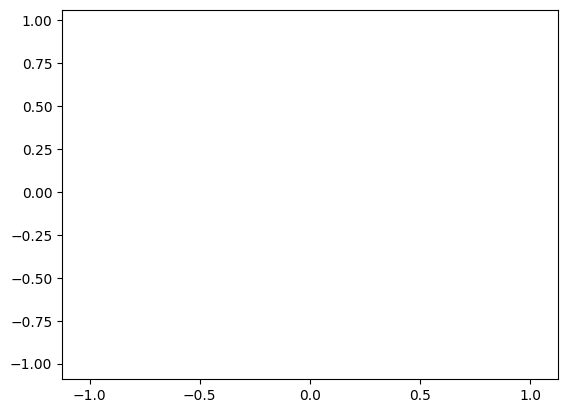

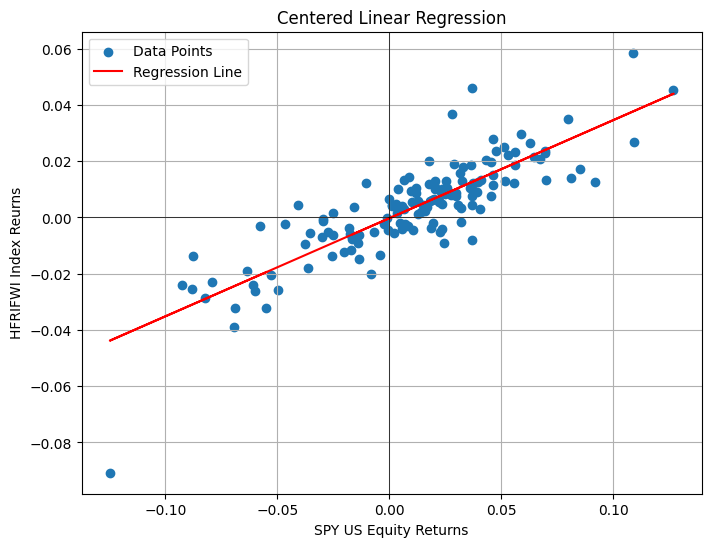

Slope: 0.3487
Intercept: -0.0003
R-squared: 0.7140
P-value: 0.0000
Standard Error: 0.0185


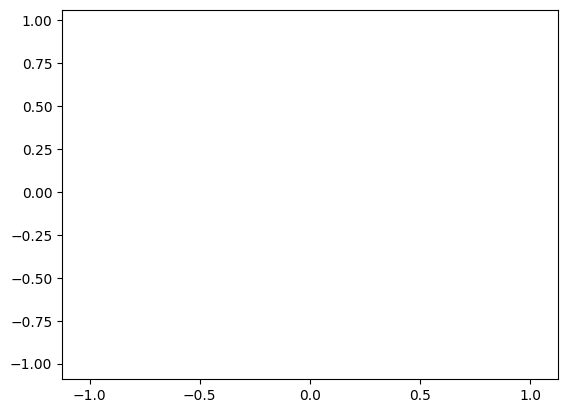

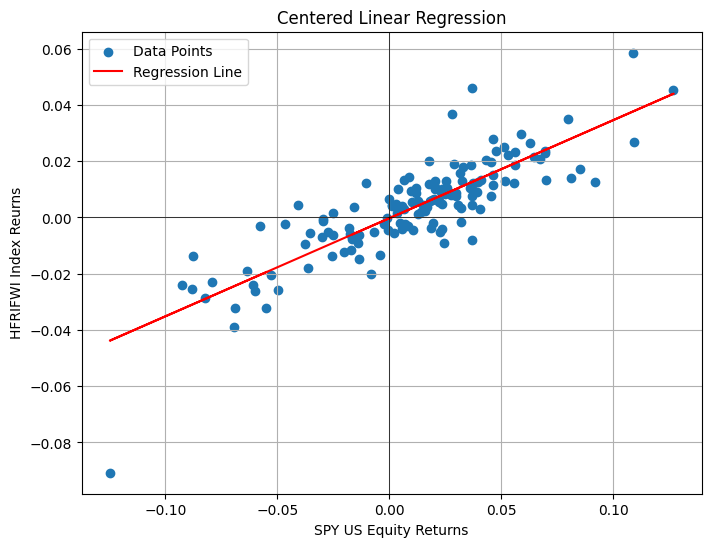

Slope: 0.3487
Intercept: -0.0003
R-squared: 0.7140
P-value: 0.0000
Standard Error: 0.0185


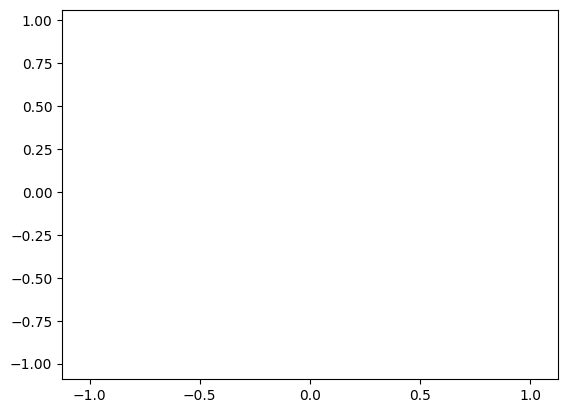

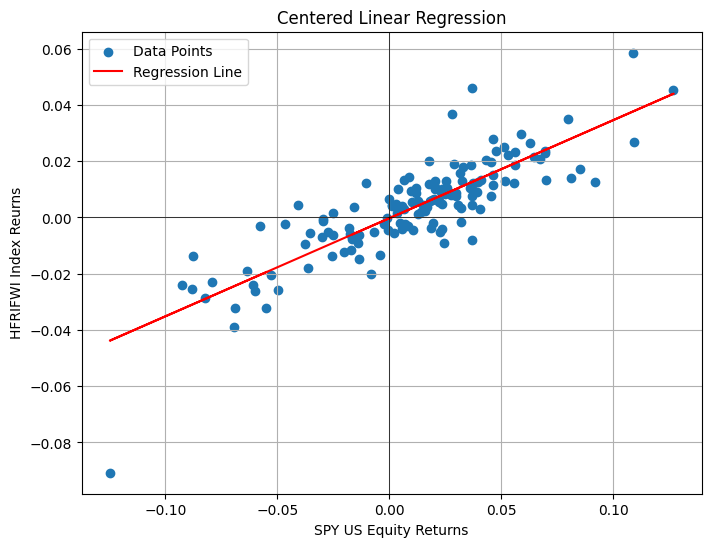

In [105]:
df_factors_r = pd.read_excel(r'../data/proshares_analysis_data.xlsx', sheet_name=r'merrill_factors')
df_factors_r.columns = ["Date"] + [df_factors_r.columns[i] for i in range(1,len(df_factors_r.columns))]
df_factors_r.index = df_factors_r["Date"]
df_factors_r.drop("Date", axis=1, inplace=True)


def centered_linear_regression_plot(X, Y):
    # Calculate linear regression parameters
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X, Y)

    # Calculate the regression line
    regression_line = slope * X + intercept

    # Find the axis limits
    x_max = max(np.max(X), 0)
    x_min = min(np.min(X), 0)
    y_max = max(np.max(Y), 0)
    y_min = min(np.min(Y), 0)
    
    # Set axis limits to be centered around the origin
    plt.xlim(x_min - 1, x_max + 1)
    plt.ylim(y_min - 1, y_max + 1)

    # Plot the data and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, label='Data Points')
    plt.plot(X, regression_line, color='red', label='Regression Line')
    
    # Add horizontal and vertical lines for the axes
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xlabel(X.name +" Returns")
    plt.ylabel(Y.name +" Reurns")
    plt.legend()
    plt.grid(True)
    plt.title('Centered Linear Regression')

    # Display linear regression statistics
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R-squared: {r_value**2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Standard Error: {std_err:.4f}")

    plt.show()

for i in range(len(df_hf_r.columns)):
    centered_linear_regression_plot(df_factors_r["SPY US Equity"], df_hf_r[df_hf_r.columns[1]])


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

#### a. Report the intercept and betas.
#### b. Are the betas realistic position sizes, or do they require huge long-short positions?
#### c. Report the R-squared.
#### d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?